# Второе задание проекта по теме "Продвинутый SQL"

В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из урока 11 «Когортный анализ. Представление результатов» в теме 4 «Установка и настройка базы данных и клиента базы данных».. Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 

# Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': '????', # имя пользователя
    'pwd': '??????', # пароль
    'host': '??????????',
    'port': ????, # порт подключения
    'db': '?????' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


## Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE DATE_TRUNC('year', creation_date)::date = '2008-01-01'
GROUP BY month_date
ORDER BY total_views DESC

'''

# выполните запрос
posts_view = pd.read_sql_query(query, con=engine)
display(posts_view)

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


<details>

<summary>Подсказка</summary>
Используйте функцию для усечения даты, а затем сгруппируйте и отсортируйте данные.
</details>

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_0: <a class="tocSkip"> </h2>


Не ясно, зачем в задании требовалась сортировка по количеству просмотров, т.к. "динамика" так не прослеживается (допустим, что временной интервал несколько лет). Найти месяц с максимальным кол-вом просмотров?. Отсротируем правильно по месяцам
</div>
*  

In [7]:
posts_view_by_mon = posts_view.sort_values(by='month_date')
display(posts_view_by_mon)

,month_date,total_views
5,2008-07-01,669895
4,2008-08-01,131367083
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841


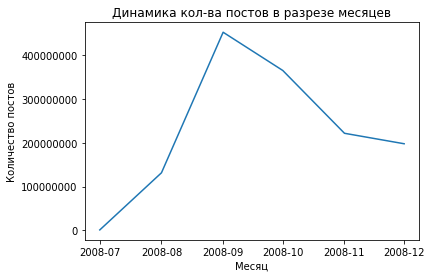

In [8]:
#динамика в графическом виде
posts_view_by_mon.plot(x='month_date', y='total_views', legend=False)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Динамика кол-ва постов в разрезе месяцев')
plt.xlabel('Месяц')
plt.ylabel('Количество постов')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>


Исправлено
</div>
*

In [9]:
posts_view_by_mon.loc[0, 'total_views'] / posts_view_by_mon.loc[5, 'total_views']

676.1187469678084

Мы наблюдаем бурный рост просмотров постов практически из 0 в июле-сентябре (в 676 раз) и постепенное скатывание на плато в октябре-декабре 2008 года.

По данным из русскоязычной Википедии Stack Overflow был запущен в августе 2008 года, при этом в статье на англ. языке указано, что в сентябре 2008 г. был объявлен запуск бета-версии нового портала. Т.о. можно заключить, что в период с июля по сентябрь происходила "накачка" пользователями нового портала вопросов-ответов про для ИТ-сферы. После выпуска бета-версии часть пользователей отвалилась по различным причинам и аудитория (ЦА) портала начала путь к своему формированию через плато и дальнейшему постепенному росту (который мы не видим, но примерно понимаем).

На графике - классический пример gartner hype cycle, т.е.:

1) триггер в июле-августе 2008 года - ходят слухи, что вот-вот новый портал запустят

2) пик завышенных ожиданий в сентябре - вау, круто, сейчас спросим наконецто, как на ассемблере эмулятор линукса под виндоуз запилить

3) дно разочарований в октбяре-декабре - ничего такого не нашли и "вапщета" хотелось бы в 2008 году уже узнавать про все эти чат-боты и жэпэтэ, а тут только вот pandas год на коленке кое-как делают

Возможно, с сентября все школьники наконецто пошли учиться и наплыв на портал снизился <=> кол-ву просмотров

## Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [10]:
# напишите запрос
query = '''
SELECT u.display_name,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.users AS u
JOIN stackoverflow.posts AS p ON u.id = p.user_id
JOIN stackoverflow.post_types AS pt ON p.post_type_id = pt.id
WHERE pt.type = 'Answer'
      AND p.creation_date::date BETWEEN u.creation_date::date AND u.creation_date::date + INTERVAL '1 month'
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY u.display_name;


'''

# выполните запрос
name_cnt = pd.read_sql_query(query, con=engine)
display(name_cnt)

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


In [11]:
name_cnt = name_cnt.sort_values(by='count', ascending=False)
name_cnt.head(20)

,display_name,count
45,Matt,29
10,Chris,29
14,Dan,21
64,Tom,19
41,Mark,17
50,Nick,16
33,Josh,16
7,Brian,15
56,Rob,15
21,Greg,12


<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

Какие аномалии наблюдаются в данных? О чём они говорят?

На первый взгляд, ничего необычного. В выборке есть пользователи с одинаковыми именами. Некоторым уникальным именам соответсвует большое количество разных пользователей. С большей долей вероятности в 2008 году в рассматриваемый период на вопрос ответил бы пользователь с именем Matt или Chris, Dan и Том. Маловероятно, что за пользователями с именем Мэт скрывается одн человек и скорее всего это вс разные пользователи. Т.е. в системе о время регистрации, возможно, е проводилась проверка на уникальность имен. С другой стороны в описании модели данных нет информации о том, что данная таблица users содержит все возможные атрибуты из БД stackoverflow. Также нет указаний, что display_name - это ник нейм или имя из ФИО пользователя. Может быть это непосредственно отображаемое имя, которое пользователь сам выбирает в любой момент времени и меняет по своему усмотрению. Сегодня он Крис, но на самом деле Степан Иванович Шпак более известный как nagibator_ololo_666.

Может быть такое, что система работала не стабильно и некто очень умный и продуктивный на ответы Мэт регистрировался 29 раз   

## Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [12]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month,
       COUNT(DISTINCT id) AS count
FROM stackoverflow.posts
WHERE user_id IN 
     (SELECT u.id
      FROM stackoverflow.users u
      JOIN stackoverflow.posts p ON p.user_id = u.id
      WHERE DATE_TRUNC('month',u.creation_date)::date = '2008-09-01'
      AND DATE_TRUNC('month', p.creation_date) =  '2008-12-01')
GROUP BY month
ORDER BY month DESC;

'''

# выполните запрос
month_cnt = pd.read_sql_query(query, con=engine)
display(month_cnt)

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые зарегистрировались в сентябре 2008 года и оставили хотя бы один пост в декабре. Затем используйте результат для среза и посчитайте посты по месяцам.</details>

Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

Динамика количества постов в рассматриваемый период укладывается в динамику кол-ва пользователей. Но выявлено 32 поста, написанных в августе 2008 года, пользователями, которые "зарегистрировались" в сентябре 2008 года. Скорее всего - ошибка выгрузки из БД или ошибка записи при регистрации события "создать пост" в системе. 

## Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [13]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts;
'''

# выполните запрос
users_posts_cnt = pd.read_sql_query(query, con=engine)
display(users_posts_cnt.head(20))
display(users_posts_cnt.query('user_id == 2'))


,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
5,1,2008-08-04 08:04:42,0,616509
6,1,2008-08-10 08:28:52,0,616509
7,1,2008-08-11 19:23:47,0,616509
8,1,2008-08-12 00:30:43,0,616509
9,1,2008-08-12 04:59:35,72431,688940


,user_id,creation_date,views_count,sum
70,2,2008-08-01 04:59:34,79087,79087
71,2,2008-08-01 05:09:56,65443,144530
72,2,2008-08-04 05:51:57,7628,152158
73,2,2008-08-21 20:53:51,0,152158
74,2,2008-10-13 23:46:09,2593,154751
75,2,2008-12-15 03:59:56,0,154751


<details>

<summary>Подсказка</summary>
Для подсчёта суммы с накоплением используйте оконную функцию.
</details>

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_0: <a class="tocSkip"> </h2>


Похоже на правду
</div>
*  

## Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [14]:
query = '''
WITH uspst AS
     (SELECT user_id,
             DATE_TRUNC('day', creation_date) AS day,
             COUNT(id) AS posts_cnt
      FROM stackoverflow.posts
      WHERE user_id IN (
            SELECT user_id
--                 COUNT(id) as posts_cnt
            FROM stackoverflow.posts
            WHERE DATE_TRUNC('month', creation_date)::date = '2008-08-01'
            GROUP BY user_id
            HAVING COUNT(id) > 120)
            AND DATE_TRUNC('month', creation_date)::date = '2008-08-01'
    GROUP BY user_id, day)

SELECT user_id,
       AVG(posts_cnt) AS avg_daily
FROM uspst
WHERE posts_cnt > 0
GROUP BY user_id
ORDER BY avg_daily;
'''

# выполните запрос
avg_posts = pd.read_sql_query(query, con=engine)
display(avg_posts.head(20))

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>


Исправлено. Во временную таблицу добавлено дополнительное условие в WHERE
</div>
* 

<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

## Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [15]:
# напишите запрос
query = '''
WITH usdays AS 
    (SELECT user_id,
            COUNT(DISTINCT creation_date::date) AS actdays
     FROM stackoverflow.posts
     WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07' 
     GROUP BY user_id)
                                       
SELECT ROUND(AVG(actdays)) AS result
FROM usdays;
'''

# выполните запрос
avg_days = pd.read_sql_query(query, con=engine)
display(avg_days)

,result
0,2.0


<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

Проанализируйте итоговую таблицу — какие выводы можно сделать?

В среднем в первую неделю декабря 2008 года пользователи активны 2 дня. Возможно, активничать 7 дней в неделю не дало общее беспокойство и интерес к новостям о разгоне марша протеста в Зимбабве, или извержения вулкана на Каматке, или предоставлении Википедии 100 тыс архивных фото из Федерального архива Германии? https://en.wikipedia.org/wiki/Portal:Current_events/December_2008

## Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [16]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       CASE 
           EXTRACT('month' FROM LAG (creation_date, 2) OVER(PARTITION BY user_id ORDER BY creation_date))
           WHEN 1 THEN 'January'
           WHEN 2 THEN 'February'
           WHEN 3 THEN 'March'
           WHEN 4 THEN 'April'
           WHEN 5 THEN 'May'
           WHEN 6 THEN 'June'
           WHEN 7 THEN 'July'
           WHEN 8 THEN 'August'
           WHEN 9 THEN 'September'
           WHEN 10 THEN 'October'
           WHEN 11 THEN 'November'
           WHEN 12 THEN 'December'
       END AS second_last_month
       
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
           
'''

# выполните запрос
prev_mon = pd.read_sql_query(query, con=engine)
display(prev_mon)

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

In [17]:
query = '''
SELECT user_id,
       creation_date,
       TO_CHAR(EXTRACT('month' FROM LAG (creation_date, 2) OVER(PARTITION BY user_id ORDER BY creation_date)), 
          second_last_month
       
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
           
'''

# выполните запрос
tes = pd.read_sql_query(query, con=engine)
display(test)

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near "FROM"
LINE 7: FROM stackoverflow.posts
        ^

[SQL: 
SELECT user_id,
       creation_date,
       TO_CHAR(EXTRACT('month' FROM LAG (creation_date, 2) OVER(PARTITION BY user_id ORDER BY creation_date)), 
          second_last_month
       
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
           
]
(Background on this error at: http://sqlalche.me/e/14/f405)

## Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH profile AS
    (SELECT user_id,
            DATE_TRUNC('month', MIN(creation_date))::date AS cohort_dt,
            COUNT(user_id) OVER (PARTITION BY DATE_TRUNC('month', MIN(creation_date))::date) AS cohort_users_cnt
    FROM stackoverflow.posts
    GROUP BY user_id),

sessions AS
    (SELECT user_id,
            DATE_TRUNC('month',creation_date)::date AS session_date
            FROM stackoverflow.posts
            GROUP BY user_id,
                     session_date)                 

SELECT p.cohort_dt,
       session_date,
       COUNT(p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND (COUNT(p.user_id) *100.0/cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY p.cohort_dt,
         session_date,
         cohort_users_cnt;
'''

# выполните запрос
retention_rate = pd.read_sql_query (query, con = engine)
display(retention_rate)


<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

In [ ]:
# постройте тепловую карту Retention Rate
retention = retention_rate.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]


plt.figure(figsize=(15, 10))
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта Retention Rate', fontsize=18)
plt.xlabel('Дата наблюдения', fontsize=16)
plt.ylabel('Месяц когорты', fontsize=16)
plt.show() 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>


Исправлено.
</div>
* 

Когорту июля рассматривать не стоит, т.к. она состоит из 3-х пользователей, которые скорее всего являются тестировщиками. Или это 2 основателя stackoverflow и сын бухгалтера. Какие-либо гипотезы, основываясь на поведении данной когорты, не стоит.

Полученный RT соответствует теоретическому, т.е. уменьшается со временем

В целом "помесячное" удержание в каждой новой когорте уменьшается быстрее. Удержание второго (третьего и четвертого) месяца каждый раз ниже в каждой новой когорте ниже аналогичного RT предыдущей когорты. Что не удивительно, т.к. количество пользователей с сентября падает, хайп проходит, "система" стремится к 30% RT

## Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH monpst AS 
    (SELECT EXTRACT(MONTH FROM creation_date::date) AS creation_month,
            COUNT(id) AS posts_count
    FROM stackoverflow.posts
    WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
    GROUP BY creation_month
    ORDER BY creation_month)

SELECT *,
      ROUND(((posts_count::numeric / LAG(posts_count) OVER(ORDER BY creation_month)) - 1) * 100, 2) AS percentage
      FROM monpst;
'''

# выполните запрос
perc = pd.read_sql_query (query, con = engine)
perc

<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

Постройте круговую диаграмму с количеством постов по месяцам.

In [ ]:
# постройте круговую диаграмму с количеством постов по месяцам
x = perc['posts_count']
lbls = 'месяц № ' + perc['creation_month'].astype(int).astype(str) + ', кол-во постов ' + perc['posts_count'].astype (str)
plt.figure(figsize=(10, 10))
plt.pie(x, labels = lbls, autopct='%.f%%')
plt.title('Количество постов по месяцам')
plt.show()

## Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH wc AS 
    (SELECT  EXTRACT(WEEK FROM creation_date)::int AS week_creation,
             MAX(creation_date) OVER(ORDER BY EXTRACT(WEEK FROM creation_date)) AS creation_date
    FROM stackoverflow.posts 
    WHERE user_id IN (SELECT user_id
                      FROM stackoverflow.posts
                      GROUP BY user_id
                      ORDER BY COUNT(id) DESC
                      LIMIT 1)
                  AND DATE_TRUNC('month', creation_date)::date = '2008-10-01'
    ORDER BY creation_date)

SELECT DISTINCT *
FROM wc
ORDER BY week_creation;
'''

# выполните запрос
top_user = pd.read_sql_query (query, con = engine)
top_user

<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>


Добавлено.
</div>
* 

# Заключение

В рамках текущего задания было продолжено ознакомление с библиотекой SQLAlchemy и созданы новые SQL-запросы с учетом новых более продвинутых и углубленны знаний, отличающизся от базовых знаний SQL.

Новые запросы блыи составлены к базе данных StackOverflow, содержащей общую информацию о пользователях портала и их постах, комментариях, вопросах, ответах и оценках в 2008 году. 

Всего суммарно было составлено 23 запроса в первой и второй частях задания. В описании к некоторым запросам добавлены краткие выводы с небольшим анализом полученных результатов. Также для визуализации результатов отдельных вопросов были построены графики и диаграммы.